<a href="https://colab.research.google.com/github/galua2001/colab/blob/main/nn4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
# Import necessary libraries
from tensorflow import keras
import numpy as np

# Generate random data
tx = (np.random.rand(1000, 2) * 1000).astype(np.int32)

# Create target variable
ty = (tx.min(axis=1) / tx.max(axis=1) <= 0.2).astype(np.int32)

# Define the model
dense1 = keras.layers.Dense(2, activation='relu', input_shape=(2,))
dense2 = keras.layers.Dense(100, activation='relu')
dense3 = keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classificatio
model = keras.Sequential([dense1, dense2, dense3])
model.add(keras.layers.Dropout(0.3))
model.summary()

# Compile the model
# Changed loss function to 'binary_crossentropy' for binary classification
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
model.fit(tx, ty, epochs=2, verbose=0)

# Evaluate the model
model.evaluate(tx, ty)

# Make predictions
model.predict(np.array([[10, 100]]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 1)                   │             101 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2014 - loss: 21.7222  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[0.8218063]], dtype=float32)

In [211]:
model.evaluate(tx, ty)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2014 - loss: 21.7222 


[21.575632095336914, 0.20999999344348907]

In [212]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [213]:
model.fit(tx, ty, epochs=2)

Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4004 - loss: 9.5578
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7699 - loss: 1.5985


In [214]:
model.predict(np.array([[1, 1000]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[0.1401007]], dtype=float32)

In [215]:
hs=model.fit(tx,ty, epochs=2, verbose=0)

In [216]:
print(hs.history.keys())

dict_keys(['accuracy', 'loss'])


In [217]:
import matplotlib.pyplot as plt

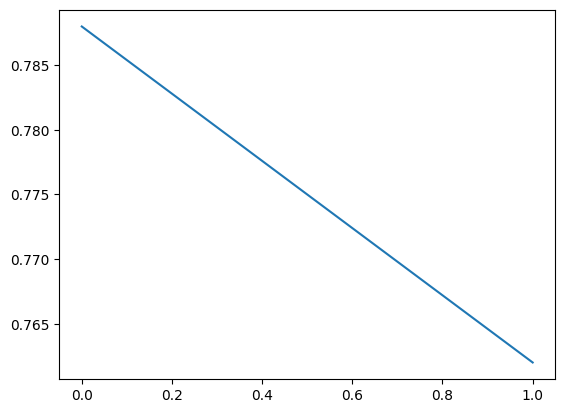

In [218]:
plt.plot(hs.history['accuracy'])

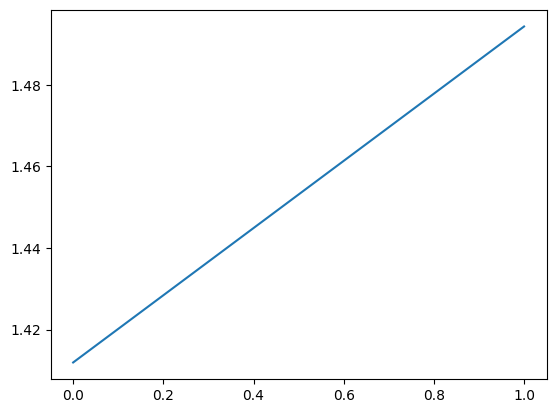

In [219]:
plt.plot(hs.history['loss'])

In [220]:
# Generate random data
vx = (np.random.rand(1000, 2) * 1000).astype(np.int32)

# Create target variable
vy = (tx.min(axis=1) / tx.max(axis=1) <= 0.2).astype(np.int32)

In [221]:
hs=model.fit(tx,ty, epochs=5, verbose=0, validation_data=(vx, vy),callbacks=[checkpoint_cb, early_stopping_cb])

In [222]:
print(early_stopping_cb.stopped_epoch)


0


In [223]:
print(hs.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


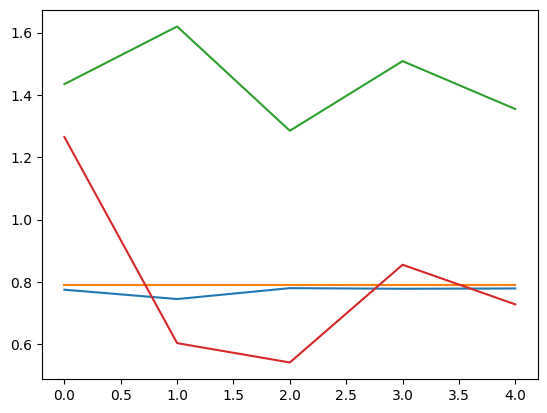

In [224]:
plt.plot(hs.history['accuracy'])
plt.plot(hs.history['val_accuracy'])
plt.plot(hs.history['loss'])
plt.plot(hs.history['val_loss'])

In [225]:
model.predict(np.array([[2,10]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.48155004]], dtype=float32)

In [226]:
model.save('my_model.h5')

In [227]:
model=keras.models.load_model('my_model.h5')